In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
import requests
import bs4
import lxml.etree as xml
from bs4 import BeautifulSoup
import csv, json, requests, sys
from pandas.io.html import read_html
from matplotlib.ticker import ScalarFormatter

In [55]:
!pip install lmfit

In [0]:
from scipy.integrate import odeint
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib import dates
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
from lmfit import minimize, Parameters, Parameter, report_fit

In [0]:
from sklearn.metrics import r2_score

In [0]:
def line_plot(df, title, xlabel=None, ylabel="Cases", h=None, v=None,
              xlim=(None, None), ylim=(0, None), math_scale=True, y_logscale=False, y_integer=False):

    ax = df.plot()
    if math_scale:
        ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
        ax.ticklabel_format(style="sci",  axis="y",scilimits=(0, 0))
    if y_logscale:
        ax.set_yscale("log")
    if y_integer:
        fmt = matplotlib.ticker.ScalarFormatter(useOffset=False)
        fmt.set_scientific(False)
        ax.yaxis.set_major_formatter(fmt)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.legend(bbox_to_anchor=(1.02, 0), loc="lower left", borderaxespad=0)
    if h is not None:
        ax.axhline(y=h, color="black", linestyle="--")
    if v is not None:
        if not isinstance(v, list):
            v = [v]
        for value in v:
            ax.axvline(x=value, color="black", linestyle="--")
    plt.tight_layout()
    plt.show()

In [0]:
url  ='https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_India'
content = requests.get(url)
soup = BeautifulSoup(content.content, 'lxml')
record = read_html(url,  attrs={"class":"wikitable mw-collapsible"})
main = pd.DataFrame(record[0])

In [60]:
main.head()

Date (2020)       State/Union Territory                 ... Deaths       Source(s)
  Date (2020) Andaman and Nicobar Islands Andhra Pradesh  ...    New Total Source(s)
0      Jan-30                         NaN            NaN  ...    NaN   NaN       NaN
1      Feb-02                         NaN            NaN  ...    NaN   NaN       NaN
2      Feb-03                         NaN            NaN  ...    NaN   NaN       NaN
3      Mar-02                         NaN            NaN  ...    NaN   NaN     [474]
4      Mar-03                         NaN            NaN  ...    NaN   NaN     [475]

[5 rows x 40 columns]

In [0]:
cases_india=np.array(main['Cases[a]'])
dates_india=np.array(main['Date (2020)'])
deaths_india=np.array(main['Deaths'])
cases_india = np.delete(cases_india, 0, 1)

In [62]:
raw = pd.read_csv("covid_19_data.csv")
raw.describe()

,SNo,Confirmed,Deaths,Recovered
count,14171.000000,14171.000000,14171.000000,14171.000000
mean,7086.000000,1796.447675,90.167949,441.899372
std,4090.959667,10017.978360,790.707358,3765.685067
min,1.000000,0.000000,0.000000,0.000000
25%,3543.500000,6.000000,0.000000,0.000000
50%,7086.000000,62.000000,0.000000,1.000000
75%,10628.500000,412.500000,4.000000,30.000000
max,14171.000000,181026.000000,19468.000000,64264.000000


In [63]:
a=cases_india.size
infected = [None]*(a-4)
dates_india_final = [None]*(a-4)
for i in range ((a)-4):
  infected[i]=cases_india[i][0]
  dates_india_final[i] = dates_india[i][0]
infected = np.asarray(infected, dtype=np.int64)
infected.astype(int)
print(infected)

[    1     2     3     5     6    28    30    31    34    39    44    50
    60    73    81    97   107   118   137   151   173   223   283   360
   434   519   606   694   834   918  1024  1251  1397  1834  2069  2547
  3072  3577  4281  4789  5274  5865  6761  7529  8447  9352 10815 11933
 12759 13835 14792 16116 17656 18985 20471 21700 23452 24942 26917]


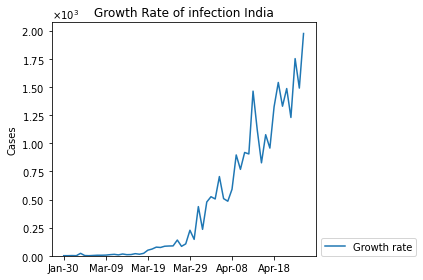

In [64]:
dates_india_final = dates_india_final[:-1]
a = infected.size
rate_infection = [None]*(a-1)
for i in range (a-1):
  rate_infection[i] = infected[i+1] - infected[i]
rate_infections = pd.DataFrame(rate_infection, index=dates_india_final, columns =['Growth rate'])
line_plot(rate_infections,"Growth Rate of infection India")

In [65]:
df = pd.DataFrame(deaths_india, columns =['Tag', 'number'])  
df1 = df.drop(len(df)-1)
df1 = df1.drop(len(df1)-1)
df1 = df1.drop(len(df1)-1)
df1 = df1.drop(len(df1)-1)
df1 = df1.drop(['Tag'],axis = 1)
df1=df1.replace(to_replace = np.nan, value = 0) 
deaths = df1.to_numpy()
deaths = np.asarray(deaths, dtype=np.int64)
deaths = deaths.astype(int)
deaths1 = deaths.flatten()
print(deaths1) 

[  0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   2   2   2
   3   3   4   4   4   7   9   9  12  16  18  20  27  32  35  41  53  62
  75  83 111 124 149 169 206 242 273 324 353 392 420 452 488 519 559 603
 652 686 723 779 826]


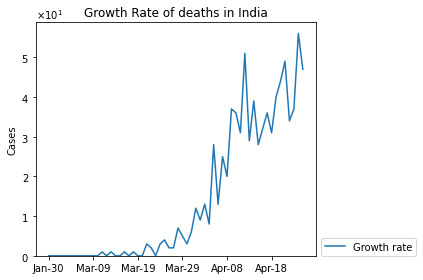

In [66]:
a = deaths1.size
rate_death = [None]*(a-1)
for i in range (a-1):
  rate_death[i] = deaths1[i+1] - deaths1[i]
rate_deaths = pd.DataFrame(rate_death, index=dates_india_final, columns =['Growth rate'])
line_plot(rate_deaths,"Growth Rate of deaths in India")

In [0]:
a = len(rate_infection)
del dates_india_final[0]
growth_rate_infection = [None]*(a-1)
growth_factor_death = [None]*(a-1)
for i in range (a-1):
  if rate_infection[i]==0:
    growth_rate_infection[i] =0
  else:  
    growth_rate_infection[i] = rate_infection[i+1]/rate_infection[i]
  if rate_death[i]==0:
    growth_factor_death[i] =0
  else:  
    growth_factor_death[i] = rate_death[i+1]/rate_death[i]


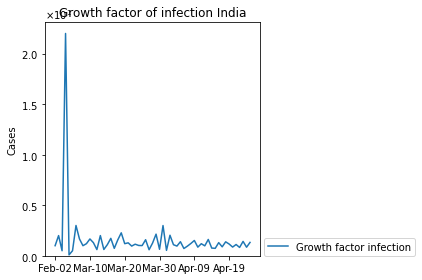

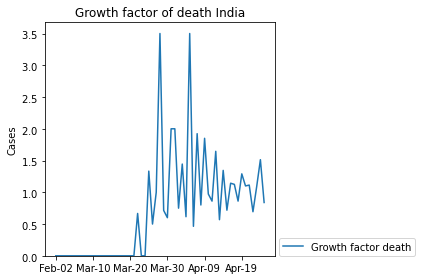

In [68]:
growth_factor_infection_india = pd.DataFrame(growth_rate_infection, index=dates_india_final, columns =['Growth factor infection'])
line_plot(growth_factor_infection_india,"Growth factor of infection India")
growth_factor_death_india = pd.DataFrame(growth_factor_death, index=dates_india_final, columns =['Growth factor death'])
line_plot(growth_factor_death_india,"Growth factor of death India")

In [0]:
days_since_start = np.array([i for i in range(len(infected))]).reshape(-1, 1)

In [0]:
population_dict ={'Global': 7454412229, 'China': 1376807262, 'India': 1339000000, 'US': 327200000, 'Italy': 60480000}

In [0]:
us_data = pd.read_excel('USA.xlsx')
#us_data.head()

In [72]:
pd.DataFrame(raw.isnull().sum()).T
", ".join(raw["Country/Region"].unique().tolist())

"Mainland China, Hong Kong, Macau, Taiwan, US, Japan, Thailand, South Korea, Singapore, Philippines, Malaysia, Vietnam, Australia, Mexico, Brazil, Colombia, France, Nepal, Canada, Cambodia, Sri Lanka, Ivory Coast, Germany, Finland, United Arab Emirates, India, Italy, UK, Russia, Sweden, Spain, Belgium, Others, Egypt, Iran, Israel, Lebanon, Iraq, Oman, Afghanistan, Bahrain, Kuwait, Austria, Algeria, Croatia, Switzerland, Pakistan, Georgia, Greece, North Macedonia, Norway, Romania, Denmark, Estonia, Netherlands, San Marino,  Azerbaijan, Belarus, Iceland, Lithuania, New Zealand, Nigeria, North Ireland, Ireland, Luxembourg, Monaco, Qatar, Ecuador, Azerbaijan, Czech Republic, Armenia, Dominican Republic, Indonesia, Portugal, Andorra, Latvia, Morocco, Saudi Arabia, Senegal, Argentina, Chile, Jordan, Ukraine, Saint Barthelemy, Hungary, Faroe Islands, Gibraltar, Liechtenstein, Poland, Tunisia, Palestine, Bosnia and Herzegovina, Slovenia, South Africa, Bhutan, Cameroon, Costa Rica, Peru, Serbia

In [0]:
data_cols = ["Infected", "Deaths", "Recovered"]
data_cols_all = ["Confirmed", "Infected", "Deaths", "Recovered"]
rate_cols = ["Fatal per Confirmed", "Recovered per Confirmed", "Fatal per (Fatal or Recovered)"]
variable_dict = {"Susceptible": "S", "Infected": "I", "Recovered": "R", "Deaths": "D"}

In [74]:
df = raw.rename({"ObservationDate": "Date", "Province/State": "Province"}, axis=1)
df["Date"] = pd.to_datetime(df["Date"])
df["Country"] = df["Country/Region"].replace(
    {
        "Mainland China": "China",
        "Hong Kong SAR": "Hong Kong",
        "Taipei and environs": "Taiwan",
        "Iran (Islamic Republic of)": "Iran",
        "Republic of Korea": "South Korea",
        "Republic of Ireland": "Ireland",
        "Macao SAR": "Macau",
        "Russian Federation": "Russia",
        "Republic of Moldova": "Moldova",
        "Taiwan*": "Taiwan",
        "Cruise Ship": "Others",
        "United Kingdom": "UK",
        "Viet Nam": "Vietnam",
        "Czechia": "Czech Republic",
        "St. Martin": "Saint Martin",
        "Cote d'Ivoire": "Ivory Coast",
        "('St. Martin',)": "Saint Martin",
        "Congo (Kinshasa)": "Congo",
    }
)
df["Province"] = df["Province"].fillna("-").replace(
    {
        "Cruise Ship": "Diamond Princess",
        "Diamond Princess cruise ship": "Diamond Princess"
    }
)
df.loc[df["Country"] == "Diamond Princess", ["Country", "Province"]] = ["Others", "Diamond Princess"]
df["Infected"] = df["Confirmed"] - df["Deaths"] - df["Recovered"]
df[data_cols_all] = df[data_cols_all].astype(np.int64)
ncov_df_ungrouped = df.loc[:, ["Date", "Country", "Province", *data_cols_all]]
#print(ncov_df_ungrouped.tail())
infected_indians = np.full(shape=73,fill_value=0.0,dtype=np.float)                                   
absd = np.array([0.0749,0.0754,0.0761,0.0769,0.0779,0.0790,0.0802,0.0816,0.0830,0.0842,0.0853,0.0863,0.0873,0.0882,0.0891]) 
infected_indians = np.concatenate([infected_indians, absd])
pd.DataFrame(ncov_df_ungrouped.isnull().sum()).T
", ".join(ncov_df_ungrouped["Country"].unique().tolist())

'China, Hong Kong, Macau, Taiwan, US, Japan, Thailand, South Korea, Singapore, Philippines, Malaysia, Vietnam, Australia, Mexico, Brazil, Colombia, France, Nepal, Canada, Cambodia, Sri Lanka, Ivory Coast, Germany, Finland, United Arab Emirates, India, Italy, UK, Russia, Sweden, Spain, Belgium, Others, Egypt, Iran, Israel, Lebanon, Iraq, Oman, Afghanistan, Bahrain, Kuwait, Austria, Algeria, Croatia, Switzerland, Pakistan, Georgia, Greece, North Macedonia, Norway, Romania, Denmark, Estonia, Netherlands, San Marino,  Azerbaijan, Belarus, Iceland, Lithuania, New Zealand, Nigeria, North Ireland, Ireland, Luxembourg, Monaco, Qatar, Ecuador, Azerbaijan, Czech Republic, Armenia, Dominican Republic, Indonesia, Portugal, Andorra, Latvia, Morocco, Saudi Arabia, Senegal, Argentina, Chile, Jordan, Ukraine, Saint Barthelemy, Hungary, Faroe Islands, Gibraltar, Liechtenstein, Poland, Tunisia, Palestine, Bosnia and Herzegovina, Slovenia, South Africa, Bhutan, Cameroon, Costa Rica, Peru, Serbia, Slovaki

In [75]:
total_df = ncov_df_ungrouped.groupby("Date").sum()
total_df[rate_cols[0]] = total_df["Deaths"] / total_df[data_cols].sum(axis=1)
total_df[rate_cols[1]] = total_df["Recovered"] / total_df[data_cols].sum(axis=1)
total_df[rate_cols[2]] = total_df["Deaths"] / (total_df["Deaths"] + total_df["Recovered"])
total_df.tail()

,Confirmed,Infected,Deaths,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-04-07,1426096,1044177,81865,300054,0.057405,0.210402,0.214352
2020-04-08,1511104,1094105,88338,328661,0.058459,0.217497,0.211842
2020-04-09,1595350,1145920,95455,353975,0.059833,0.221879,0.212391
2020-04-10,1691719,1213098,102525,376096,0.060604,0.222316,0.214209
2020-04-11,1771514,1260901,108503,402110,0.061249,0.226987,0.212496


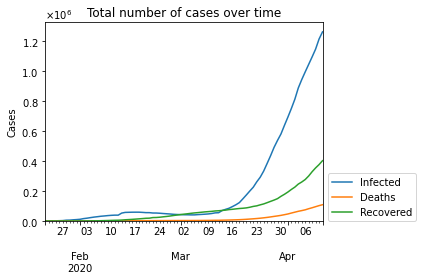

In [76]:
line_plot(total_df[data_cols], "Total number of cases over time")

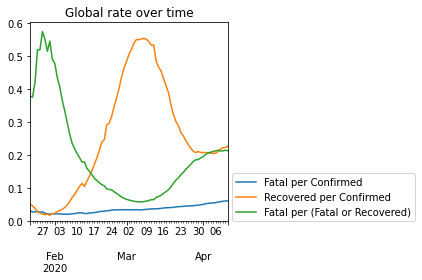

In [77]:
line_plot(total_df[rate_cols], "Global rate over time", ylabel="", math_scale=False)

In [0]:
#total_df[rate_cols].head(5)

In [79]:
total_df[rate_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Fatal per Confirmed,81.0,0.035452,0.011369,0.020408,0.025498,0.034036,0.043376,0.061249
Recovered per Confirmed,81.0,0.249411,0.172305,0.017365,0.104274,0.217497,0.387656,0.552602
Fatal per (Fatal or Recovered),81.0,0.196325,0.142110,0.057464,0.088459,0.158960,0.214209,0.573427


In [0]:
india = ncov_df_ungrouped[ncov_df_ungrouped['Country'] == 'India']
india_data = india
india = india.drop(columns= ['Country', 'Province'])
india = india.set_index('Date') 

In [81]:
india.head()

,Confirmed,Infected,Deaths,Recovered
Date,,,,
2020-01-30,1,1,0,0
2020-01-31,1,1,0,0
2020-02-01,1,1,0,0
2020-02-02,2,2,0,0
2020-02-03,3,3,0,0


In [0]:
italy = ncov_df_ungrouped[ncov_df_ungrouped['Country'] == 'Italy']
italy = italy.drop(columns= ['Country', 'Province'])
italy = italy.set_index('Date') 

In [0]:
us_data =us_data.set_index('Date')

In [84]:
#us_data.head() 
us_data = us_data.drop(['SNo'], axis=1) 
us_data.head()

,Confirmed,Deaths,Recovered
Date,,,
01/22/2020,1,0,0
01/23/2020,1,0,0
01/24/2020,2,0,0
01/25/2020,2,0,0
01/26/2020,5,0,0


In [0]:
usa = us_data

In [86]:
india.head()

,Confirmed,Infected,Deaths,Recovered
Date,,,,
2020-01-30,1,1,0,0
2020-01-31,1,1,0,0
2020-02-01,1,1,0,0
2020-02-02,2,2,0,0
2020-02-03,3,3,0,0


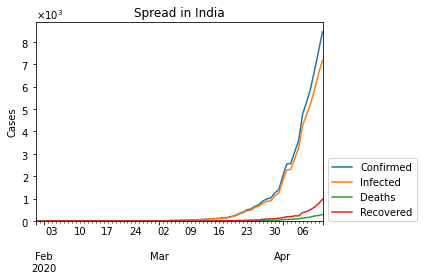

In [87]:
line_plot(india, "Spread in India")

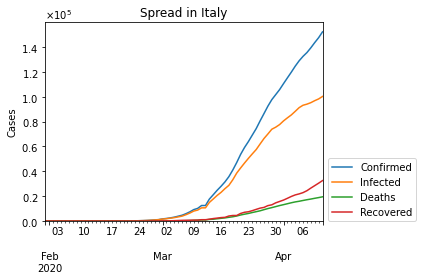

In [88]:
line_plot(italy, "Spread in Italy")

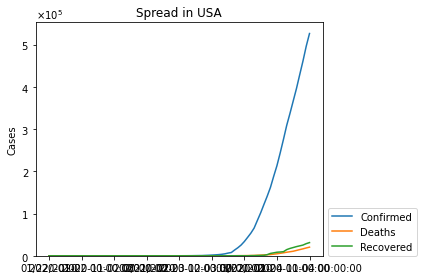

In [89]:
line_plot(usa, "Spread in USA")

In [0]:
def fa(N, a, b, beta):
    fa = -beta*a*b
    return fa

# Infected equation
def fb(N, a, b, beta, gamma):
    fb = beta*a*b - gamma*b
    return fb

# Recovered/deceased equation
def fc(N, b, gamma):
    fc = gamma*b
    return fc

In [0]:
def rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs):
    a1 = fa(N, a, b, beta)*hs
    b1 = fb(N, a, b, beta, gamma)*hs
    c1 = fc(N, b, gamma)*hs
    ak = a + a1*0.5
    bk = b + b1*0.5
    ck = c + c1*0.5
    a2 = fa(N, ak, bk, beta)*hs
    b2 = fb(N, ak, bk, beta, gamma)*hs
    c2 = fc(N, bk, gamma)*hs
    ak = a + a2*0.5
    bk = b + b2*0.5
    ck = c + c2*0.5
    a3 = fa(N, ak, bk, beta)*hs
    b3 = fb(N, ak, bk, beta, gamma)*hs
    c3 = fc(N, bk, gamma)*hs
    ak = a + a3
    bk = b + b3
    ck = c + c3
    a4 = fa(N, ak, bk, beta)*hs
    b4 = fb(N, ak, bk, beta, gamma)*hs
    c4 = fc(N, bk, gamma)*hs
    a = a + (a1 + 2*(a2 + a3) + a4)/6
    b = b + (b1 + 2*(b2 + b3) + b4)/6
    c = c + (c1 + 2*(c2 + c3) + c4)/6
    return a, b, c

In [0]:
def SIR(N, b0, beta, gamma, hs):
    a = float(N-1)/N -b0
    b = float(1)/N +b0
    c = 0.

    sus, inf, rec= [],[],[]
    for i in range(10000): # Run for a certain number of time-steps
        sus.append(a)
        inf.append(b)
        rec.append(c)
        a,b,c = rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs)

    return sus, inf, rec

In [0]:
from scipy import integrate, optimize

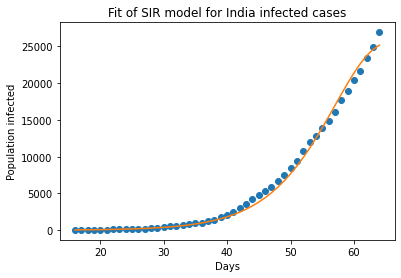

Optimal parameters: beta = 25.44203626894063  and gamma =  25.285406008814956


In [94]:
population = population_dict['India']
country_df = pd.DataFrame()
country_df['ConfirmedCases'] = infected
country_df = country_df[10:]
country_df['day_count'] = list(range(1,len(country_df)+1))

ydata = [i for i in country_df.ConfirmedCases]
xdata = country_df.day_count+15
ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0


#t = np.linspace(0, 180, 180)

def sir_model(y, x, beta, gamma):
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

#y0=sus0,inf0,rec0
popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)
#print(ydata.size)
plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.title("Fit of SIR model for India infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

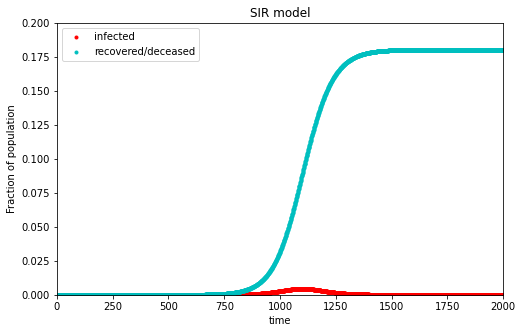

In [95]:
N = population_dict['India']
b0 = 0
beta = 1.663
gamma = 1.508
hs = 0.1

sus, inf, rec = SIR(N, b0, beta, gamma, hs)

f = plt.figure(figsize=(8,5)) 
#plt.plot(sus, 'b.', label='susceptible');
plt.plot(inf, 'r.', label='infected');
plt.plot(rec, 'c.', label='recovered/deceased');
plt.title("SIR model")
plt.xlabel("time", fontsize=10);
plt.ylabel("Fraction of population", fontsize=10);
plt.legend(loc='best')
plt.xlim(0,2000)
plt.ylim(0,0.2)
plt.savefig('SIR_example.png')
plt.show()

/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


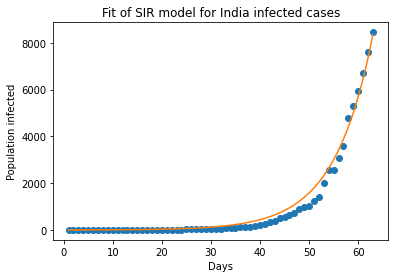

 beta = 0.001002393557002238  and gamma =  0.12690827538701768


In [96]:
population = population_dict['India']
country_df = pd.DataFrame()
country_df['ConfirmedCases'] = india['Confirmed'].values
country_df = country_df[10:]
country_df['day_count'] = list(range(1,len(country_df)+1))

ydata = [i for i in country_df.ConfirmedCases]
xdata = country_df.day_count
ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0

def sir_model(y, x, beta, gamma):
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)
infected_indans = fitted
plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.title("Fit of SIR model for India infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print(" beta =", popt[0], " and gamma = ", popt[1]*(-1))

In [97]:
actual = np.array(country_df['ConfirmedCases'])
list1 = actual.tolist()
list2 = fitted.tolist()
r2_score(list1, list2)

0.9874896218757344

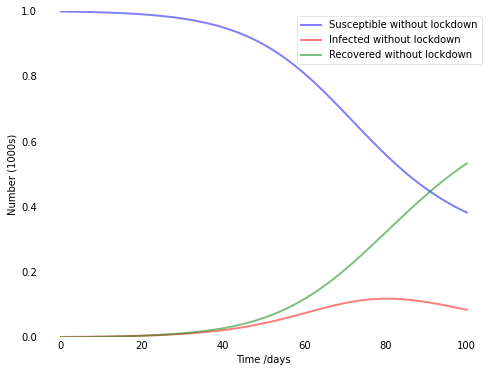

In [98]:
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = india['Confirmed'].min(), 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.18, 0.1
# A grid of time points (in days)
t = np.linspace(0, 100, 100)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(figsize=(8, 6),facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
#print(infected.shape)
#ax.plot(days_since_start, infected/1376826, 'yellow', alpha=0.5, lw=2,label='infected indians')
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible without lockdown')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected without lockdown')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered without lockdown')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [0]:
def fa(N, a, b, beta):
    fa = -beta*a*b
    return fa

# Infected equation
def fb(N, a, b, beta, gamma):
    fb = beta*a*b - gamma*b
    return fb

# Recovered/deceased equation
def fc(N, b, gamma):
    fc = gamma*b
    return fc


def rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs):
    a1 = fa(N, a, b, beta)*hs
    b1 = fb(N, a, b, beta, gamma)*hs
    c1 = fc(N, b, gamma)*hs
    ak = a + a1*0.5
    bk = b + b1*0.5
    ck = c + c1*0.5
    a2 = fa(N, ak, bk, beta)*hs
    b2 = fb(N, ak, bk, beta, gamma)*hs
    c2 = fc(N, bk, gamma)*hs
    ak = a + a2*0.5
    bk = b + b2*0.5
    ck = c + c2*0.5
    a3 = fa(N, ak, bk, beta)*hs
    b3 = fb(N, ak, bk, beta, gamma)*hs
    c3 = fc(N, bk, gamma)*hs
    ak = a + a3
    bk = b + b3
    ck = c + c3
    a4 = fa(N, ak, bk, beta)*hs
    b4 = fb(N, ak, bk, beta, gamma)*hs
    c4 = fc(N, bk, gamma)*hs
    a = a + (a1 + 2*(a2 + a3) + a4)/6
    b = b + (b1 + 2*(b2 + b3) + b4)/6
    c = c + (c1 + 2*(c2 + c3) + c4)/6
    return a, b, c


def SIR(N, b0, beta, gamma, hs):
    a = float(N-1)/N -b0
    b = float(1)/N +b0
    c = 0.

    sus, inf, rec= [],[],[]
    for i in range(10000): # Run for a certain number of time-steps
        sus.append(a)
        inf.append(b)
        rec.append(c)
        a,b,c = rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs)

    return sus, inf, rec

In [0]:
from scipy import integrate, optimize

/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


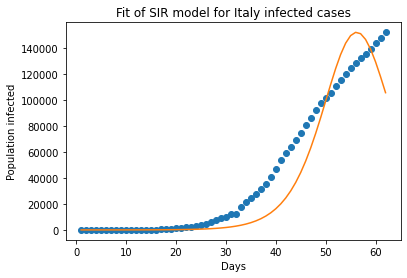

Optimal parameters: beta = 3.1656984063288776  and gamma =  2.9437322517892874


In [101]:
population = population_dict['Italy']
country_df = pd.DataFrame()
country_df['ConfirmedCases'] = italy['Confirmed'].values
country_df = country_df[10:]
country_df['day_count'] = list(range(1,len(country_df)+1))

ydata = [i for i in country_df.ConfirmedCases]
xdata = country_df.day_count
ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0

def sir_model(y, x, beta, gamma):
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)

plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.title("Fit of SIR model for Italy infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

In [102]:
actual = np.array(country_df['ConfirmedCases'])
list1 = actual.tolist()
list2 = fitted.tolist()
r2_score(list1, list2)

0.8898582899368166

/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars


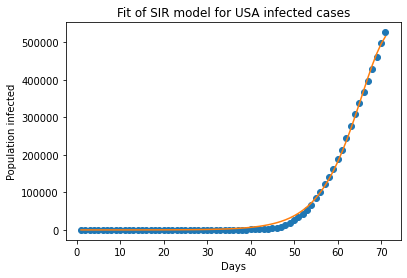

Optimal parameters: beta = 3.060400117754389  and gamma =  2.887132934811083


In [103]:
population = population_dict['US']
country_df = pd.DataFrame()
country_df['ConfirmedCases'] = usa['Confirmed'].values
country_df = country_df[10:]
country_df['day_count'] = list(range(1,len(country_df)+1))

ydata = [i for i in country_df.ConfirmedCases]
xdata = country_df.day_count
ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0

def sir_model(y, x, beta, gamma):
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)

plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.title("Fit of SIR model for USA infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

In [104]:
actual = np.array(country_df['ConfirmedCases'])
list1 = actual.tolist()
list2 = fitted.tolist()
r2_score(list1, list2)

0.9981791199441333